<a href="https://colab.research.google.com/github/haraharaman/learning/blob/main/3%E7%AB%A0_%E9%A1%A7%E5%AE%A2%E3%81%AE%E5%85%A8%E4%BD%93%E5%83%8F%E3%82%92%E6%8A%8A%E6%8F%A1%E3%81%99%E3%82%8B10%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
# Google Driveと接続を行います。これを行うことで、Driveにあるデータにアクセスできるようになります。
# 下記セルを実行すると、Googleアカウントのログインを求められますのでログインしてください。
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
# 作業フォルダへの移動を行います。
# 人によって作業場所がことなるので、その場合作業場所を変更してください。
import os 
os.chdir('/content/drive/MyDrive/勉強/Colab Notebooks/100knock-data_analytics/3章') #ここを変更。

# 3章 顧客の全体像を把握する１０本ノック

ここでは、スポーツジムの会員データを使って顧客の行動を分析していきます。  
これまでと同様にまずはデータを理解し、加工した後、  
顧客の行動データを分析していきましょう。  
ここでは、機械学習に向けての初期分析を行います。

### ノック21：データを読み込んで把握しよう

In [125]:
import pandas as pd

In [126]:
log = pd.read_csv("use_log.csv")
customers = pd.read_csv("customer_master.csv")
classes = pd.read_csv("class_master.csv")
campaigns = pd.read_csv("campaign_master.csv")

In [127]:
customers

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0
...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0


### ノック22：顧客データを整形しよう

In [128]:
join_customers = pd.merge(customers, classes, how="left")
join_customers = pd.merge(join_customers, campaigns, how="left")

In [129]:
join_customers.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

### ノック23：顧客データの基礎集計をしよう

In [130]:
join_customers.groupby("class_name").count()["customer_id"]

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [131]:
join_customers.groupby("gender").count()["customer_id"]

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [132]:
join_customers.groupby("is_deleted").count()["customer_id"]

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

### ノック24：最新顧客データの基礎集計をしよう

In [133]:
#最新顧客データ
join_customers["end_date"] = pd.to_datetime(join_customers["end_date"])
current_customer = join_customers.loc[(join_customers["end_date"] >= pd.to_datetime("20190331"))|(join_customers["end_date"].isna())]
current_customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,ナイト,6000,通常
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaT,CA1,0,オールタイム,10500,通常
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaT,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,オールタイム,10500,通常


In [134]:
current_customer.groupby("gender").count()["customer_id"]

gender
F    1400
M    1553
Name: customer_id, dtype: int64

In [135]:
current_customer.groupby("class_name").count()["customer_id"]

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64

In [136]:
current_customer.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64

### ノック25：利用履歴データを集計しよう

In [137]:
log["month"] = pd.to_datetime(log["usedate"]).dt.strftime("%Y%m")
log

,log_id,customer_id,usedate,month
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804
...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903
197424,L00000049209754,TS979550,2019-03-31,201903
197425,L00000049209755,TS995299,2019-03-31,201903
197426,L00000049209756,TS995853,2019-03-31,201903


In [138]:
log_month = log.groupby(["month","customer_id"]).count()
log_month

log_id  usedate
month  customer_id                 
201804 AS002855          4        4
       AS009013          2        2
       AS009373          3        3
       AS015315          6        6
       AS015739          7        7
...                    ...      ...
201903 TS995853          8        8
       TS998593          8        8
       TS999079          3        3
       TS999231          6        6
       TS999855          4        4

[36842 rows x 2 columns]

In [139]:
#@title デフォルトのタイトル テキスト
log_customer = log_month.groupby(["customer_id"]).agg(["mean","median","max","min"])["usedate"]
log_customer

,mean,median,max,min
customer_id,,,,
AS002855,4.500000,5.0,7,2
AS008805,4.000000,4.0,8,1
AS009013,2.000000,2.0,2,2
AS009373,5.083333,5.0,7,3
AS015233,7.545455,7.0,11,4
...,...,...,...,...
TS995853,9.500000,9.5,11,8
TS998593,8.142857,8.0,9,7
TS999079,4.916667,5.5,9,2



### ノック26：利用履歴データから定期利用フラグを作成しよう

In [140]:
log["usedate"] = pd.to_datetime(log["usedate"])
log["weekday"] = log["usedate"].dt.weekday
log_weekly = log.groupby(["customer_id","month","weekday"],as_index = False).count()[["customer_id","month","weekday","log_id"]]
log_weekly

,customer_id,month,weekday,log_id
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


In [141]:
log_weekly = log_weekly.groupby("customer_id", as_index=False).max()
log_weekly["count_flg"] = 0
log_weekly["count_flg"] = log_weekly["count_flg"].where(log_weekly["log_id"] <4,1)
log_weekly = log_weekly.rename(columns={"log_id":"count"})
log_weekly


,customer_id,month,weekday,count,count_flg
0,AS002855,201903,6,5,1
1,AS008805,201903,6,4,1
2,AS009013,201804,0,2,0
3,AS009373,201903,6,5,1
4,AS015233,201903,6,5,1
...,...,...,...,...,...
4187,TS995853,201903,6,5,1
4188,TS998593,201903,6,5,1
4189,TS999079,201903,6,5,1
4190,TS999231,201903,6,5,1


### ノック27：顧客データと利用履歴データを結合しよう

In [142]:
join_customers = pd.merge(join_customers,log_customer, how="left", on="customer_id")
join_customers = pd.merge(join_customers,log_weekly, how="left", on="customer_id")
join_customers

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,month,weekday,count,count_flg
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,201903,6,4,1
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,201903,5,5,1
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,201903,5,5,1
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,201903,5,5,1
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,201903,6,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,オールタイム,10500,通常,8.000000,8.0,8,8,201903,5,3,0
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaT,CA1,0,オールタイム,10500,通常,10.000000,10.0,10,10,201903,6,3,0
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaT,CA1,0,ナイト,6000,通常,8.000000,8.0,8,8,201903,6,2,0
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,オールタイム,10500,通常,11.000000,11.0,11,11,201903,6,3,0


### ノック28：会員期間を計算しよう

In [144]:
from dateutil.relativedelta import relativedelta
join_customers["end_date"] = join_customers["end_date"].fillna("20190430")
join_customers["start_date"] = pd.to_datetime(join_customers["start_date"])
join_customers["end_date"] = pd.to_datetime(join_customers["end_date"])
join_customers

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,month,weekday,count,count_flg
0,OA832399,XXXX,C01,F,2015-05-01,2019-04-30,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,201903,6,4,1
1,PL270116,XXXXX,C01,M,2015-05-01,2019-04-30,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,201903,5,5,1
2,OA974876,XXXXX,C01,M,2015-05-01,2019-04-30,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,201903,5,5,1
3,HD024127,XXXXX,C01,F,2015-05-01,2019-04-30,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,201903,5,5,1
4,HD661448,XXXXX,C03,F,2015-05-01,2019-04-30,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,201903,6,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,2019-04-30,CA1,0,オールタイム,10500,通常,8.000000,8.0,8,8,201903,5,3,0
4188,HD246549,XXXXX,C01,F,2019-03-14,2019-04-30,CA1,0,オールタイム,10500,通常,10.000000,10.0,10,10,201903,6,3,0
4189,GD037007,XXXXX,C03,M,2019-03-14,2019-04-30,CA1,0,ナイト,6000,通常,8.000000,8.0,8,8,201903,6,2,0
4190,OA953150,XXXXX,C01,M,2019-03-14,2019-04-30,CA1,0,オールタイム,10500,通常,11.000000,11.0,11,11,201903,6,3,0


In [145]:
join_customers["diff_date"] = 0
for i in range(len(join_customers)):
  delta = relativedelta(join_customers["end_date"][i],join_customers["start_date"][i])
  join_customers["diff_date"].iloc[i] = delta.years*12 + delta.months
join_customers

<ipython-input-145-0020646af93b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  join_customers["diff_date"].iloc[i] = delta.years*12 + delta.months


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,month,weekday,count,count_flg,diff_date
0,OA832399,XXXX,C01,F,2015-05-01,2019-04-30,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,201903,6,4,1,47
1,PL270116,XXXXX,C01,M,2015-05-01,2019-04-30,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,201903,5,5,1,47
2,OA974876,XXXXX,C01,M,2015-05-01,2019-04-30,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,201903,5,5,1,47
3,HD024127,XXXXX,C01,F,2015-05-01,2019-04-30,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,201903,5,5,1,47
4,HD661448,XXXXX,C03,F,2015-05-01,2019-04-30,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,201903,6,5,1,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,2019-04-30,CA1,0,オールタイム,10500,通常,8.000000,8.0,8,8,201903,5,3,0,1
4188,HD246549,XXXXX,C01,F,2019-03-14,2019-04-30,CA1,0,オールタイム,10500,通常,10.000000,10.0,10,10,201903,6,3,0,1
4189,GD037007,XXXXX,C03,M,2019-03-14,2019-04-30,CA1,0,ナイト,6000,通常,8.000000,8.0,8,8,201903,6,2,0,1
4190,OA953150,XXXXX,C01,M,2019-03-14,2019-04-30,CA1,0,オールタイム,10500,通常,11.000000,11.0,11,11,201903,6,3,0,1


### ノック29：顧客行動の各種統計量を把握しよう

In [146]:
#月訪問（mean,max,min,median）の統計量
join_customers[["mean","max","min","median"]].describe()

,mean,max,min,median
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,7.823950,3.041269,5.250596
std,1.777533,2.168959,1.951565,1.874874
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,7.000000,2.000000,4.000000
50%,5.000000,8.000000,3.000000,5.000000
75%,6.416667,9.000000,4.000000,6.500000
max,12.000000,14.000000,12.000000,12.000000


In [149]:
#月に同じ曜日に4回以上来る人-> 1
join_customers.groupby("count_flg").count()["customer_id"]

count_flg
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

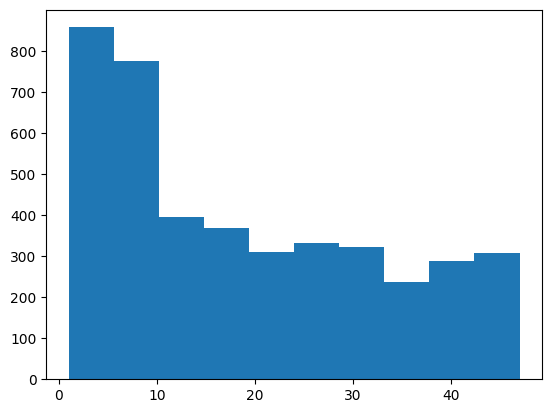

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(join_customers["diff_date"])

### ノック30：退会ユーザーと継続ユーザーの違いを把握しよう

In [159]:
join_customers.loc[join_customers["is_deleted"]==1].describe()

,is_deleted,price,mean,median,max,min,weekday,count,count_flg,diff_date
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,5.546667,3.215556,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,1.123428,1.217087,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,6.000000,2.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,6.000000,3.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,6.000000,4.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,6.000000,5.000000,1.000000,23.000000


In [160]:
join_customers.loc[join_customers["is_deleted"]==0].describe()

,is_deleted,price,mean,median,max,min,weekday,count,count_flg,diff_date
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,5.909923,4.865588,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.376604,0.406154,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,1.000000,2.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,6.000000,5.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,6.000000,5.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,6.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,6.000000,5.000000,1.000000,47.000000


In [161]:
join_customers.to_csv("join_customers.csv", index = False)